# Trabalho Prático 1 - Problemas das Barracas
    Resumo: "Em um evento, os homens e as mulheres estão em um campo (representado por um plano cartesiano comum), e devem se estabelecer em barracas quadradas, todas paralelas. O trabalho é receber um monte de entradas com o número de barracas masculinas e femininas, depois as coordenadas do ponto inferior esquerdo e superior direito de cada barraca, e informar se é possível separar as barracas por um linha de espessura infima."
    
    Entradas:
    OBS: "A entrada pode ser lida de qualquer arquivo ou através da entrada padrão (teclado)."
    3 3   <-- número de barracas masculinas e femininas
    10 10 20 20
    30 30 40 40  <-- coordenadas dos pontos para determinar a barraca
    50 50 60 60
    30 10 40 20
    50 30 60 40
    70 50 80 60
    0 0   <-- final da execução
    
    Saídas:
    OBS: "A saída não deve ser escrita em nenhum arquivo. Ela deve ser escrita na saída padrão."
    "É possível separar os dois grupos!", se for possível separá-los. Caso contrário, imprima: “Não é possível separar os dois grupos!".

Estratégia: usar perímetros entre duplas de barracas e verificar suas colisões com outras duplas ou barracas.

- Usar biblioteca "polygons", possui objetos para polígonos e verificação de colisão.

4 casos possíveis, de acordo com o número de barracas:

    -> se A,B = 0: encerra o programa
    -> se A,B = 1: possível direto
    -> se A>=1 e B=0: possível direto
    -> se A>1 e B=1: B fixo, verifica todas as duplas possíveis com A
    -> se A,B>1: verifica todas as duplas possiveis com A com todas as duplas possíveis com B

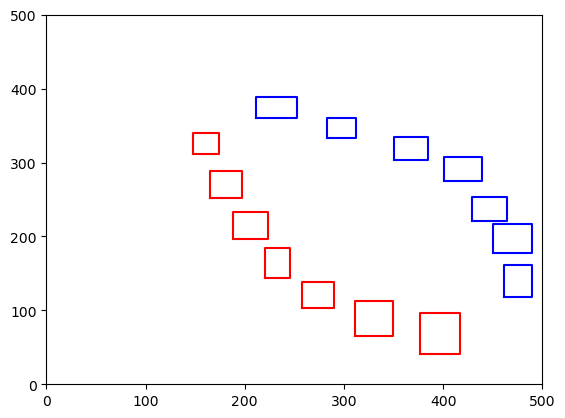


 ->  1 
A: [<POLYGON ((377 41, 377 96, 417 96, 417 41, 377 41))>, <POLYGON ((311 65, 311 112, 349 112, 349 65, 311 65))>, <POLYGON ((258 103, 258 138, 290 138, 290 103, 258 103))>, <POLYGON ((220 144, 220 184, 246 184, 246 144, 220 144))>, <POLYGON ((188 196, 188 233, 223 233, 223 196, 188 196))>, <POLYGON ((165 252, 165 288, 197 288, 197 252, 165 252))>, <POLYGON ((148 312, 148 340, 174 340, 174 312, 148 312))>]
B: [<POLYGON ((461 118, 461 161, 490 161, 490 118, 461 118))>, <POLYGON ((450 177, 450 217, 490 217, 490 177, 450 177))>, <POLYGON ((429 221, 429 253, 464 253, 464 221, 429 221))>, <POLYGON ((401 275, 401 307, 439 307, 439 275, 401 275))>, <POLYGON ((350 303, 350 335, 385 335, 385 303, 350 303))>, <POLYGON ((283 333, 283 360, 312 360, 312 333, 283 333))>, <POLYGON ((211 360, 211 388, 253 388, 253 360, 211 360))>]


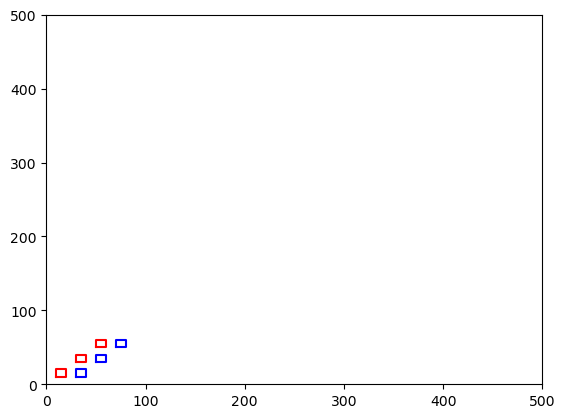


 ->  2 
A: [<POLYGON ((10 10, 10 20, 20 20, 20 10, 10 10))>, <POLYGON ((30 30, 30 40, 40 40, 40 30, 30 30))>, <POLYGON ((50 50, 50 60, 60 60, 60 50, 50 50))>]
B: [<POLYGON ((30 10, 30 20, 40 20, 40 10, 30 10))>, <POLYGON ((50 30, 50 40, 60 40, 60 30, 50 30))>, <POLYGON ((70 50, 70 60, 80 60, 80 50, 70 50))>]


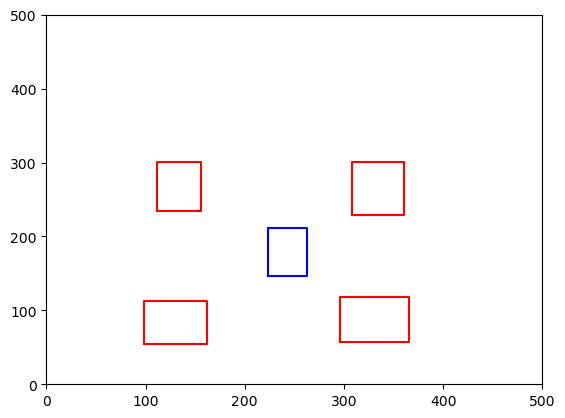


 ->  3 
A: [<POLYGON ((98 55, 98 113, 162 113, 162 55, 98 55))>, <POLYGON ((296 57, 296 118, 366 118, 366 57, 296 57))>, <POLYGON ((112 235, 112 301, 156 301, 156 235, 112 235))>, <POLYGON ((308 229, 308 301, 361 301, 361 229, 308 229))>]
B: [<POLYGON ((223 147, 223 212, 263 212, 263 147, 223 147))>]


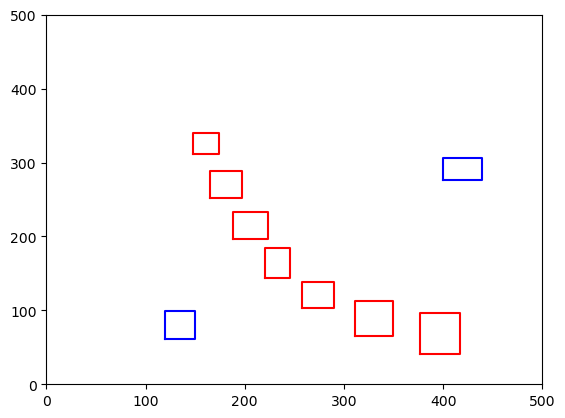


 ->  4 
A: [<POLYGON ((377 41, 377 96, 417 96, 417 41, 377 41))>, <POLYGON ((311 65, 311 112, 349 112, 349 65, 311 65))>, <POLYGON ((258 103, 258 138, 290 138, 290 103, 258 103))>, <POLYGON ((220 144, 220 184, 246 184, 246 144, 220 144))>, <POLYGON ((188 196, 188 233, 223 233, 223 196, 188 196))>, <POLYGON ((165 252, 165 288, 197 288, 197 252, 165 252))>, <POLYGON ((148 312, 148 340, 174 340, 174 312, 148 312))>]
B: [<POLYGON ((120 61, 120 99, 150 99, 150 61, 120 61))>, <POLYGON ((400 276, 400 306, 439 306, 439 276, 400 276))>]


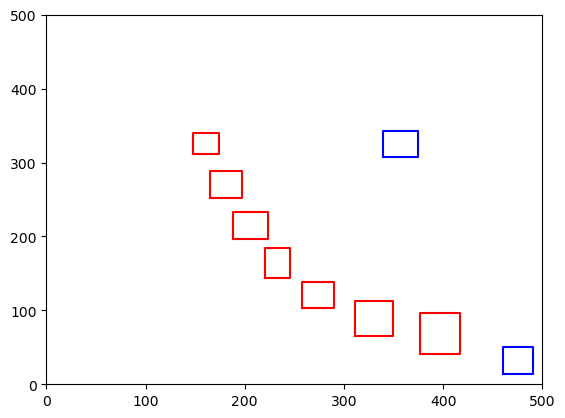


 ->  5 
A: [<POLYGON ((377 41, 377 96, 417 96, 417 41, 377 41))>, <POLYGON ((311 65, 311 112, 349 112, 349 65, 311 65))>, <POLYGON ((258 103, 258 138, 290 138, 290 103, 258 103))>, <POLYGON ((220 144, 220 184, 246 184, 246 144, 220 144))>, <POLYGON ((188 196, 188 233, 223 233, 223 196, 188 196))>, <POLYGON ((165 252, 165 288, 197 288, 197 252, 165 252))>, <POLYGON ((148 312, 148 340, 174 340, 174 312, 148 312))>]
B: [<POLYGON ((460 14, 460 51, 491 51, 491 14, 460 14))>, <POLYGON ((339 308, 339 342, 375 342, 375 308, 339 308))>]


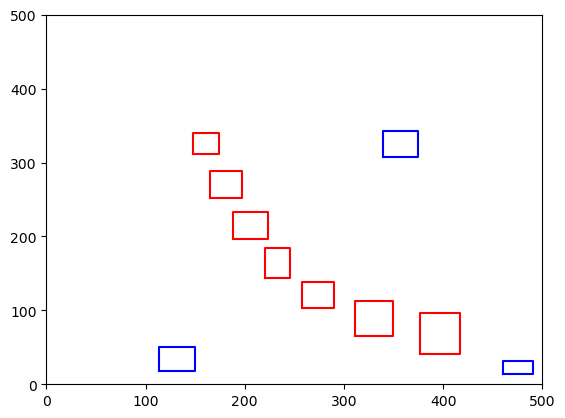


 ->  6 
A: [<POLYGON ((377 41, 377 96, 417 96, 417 41, 377 41))>, <POLYGON ((311 65, 311 112, 349 112, 349 65, 311 65))>, <POLYGON ((258 103, 258 138, 290 138, 290 103, 258 103))>, <POLYGON ((220 144, 220 184, 246 184, 246 144, 220 144))>, <POLYGON ((188 196, 188 233, 223 233, 223 196, 188 196))>, <POLYGON ((165 252, 165 288, 197 288, 197 252, 165 252))>, <POLYGON ((148 312, 148 340, 174 340, 174 312, 148 312))>]
B: [<POLYGON ((460 14, 460 32, 491 32, 491 14, 460 14))>, <POLYGON ((339 308, 339 342, 375 342, 375 308, 339 308))>, <POLYGON ((114 18, 114 50, 150 50, 150 18, 114 18))>]


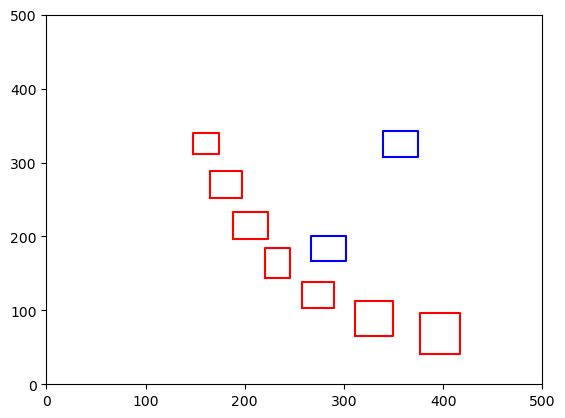


 ->  7 
A: [<POLYGON ((377 41, 377 96, 417 96, 417 41, 377 41))>, <POLYGON ((311 65, 311 112, 349 112, 349 65, 311 65))>, <POLYGON ((258 103, 258 138, 290 138, 290 103, 258 103))>, <POLYGON ((220 144, 220 184, 246 184, 246 144, 220 144))>, <POLYGON ((188 196, 188 233, 223 233, 223 196, 188 196))>, <POLYGON ((165 252, 165 288, 197 288, 197 252, 165 252))>, <POLYGON ((148 312, 148 340, 174 340, 174 312, 148 312))>]
B: [<POLYGON ((339 308, 339 342, 375 342, 375 308, 339 308))>, <POLYGON ((267 167, 267 200, 302 200, 302 167, 267 167))>]


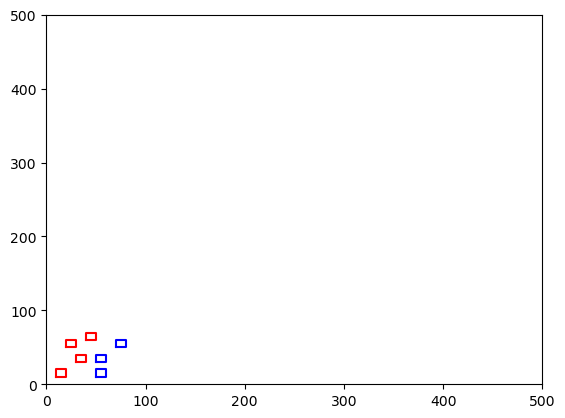


 ->  8 
A: [<POLYGON ((10 10, 10 20, 20 20, 20 10, 10 10))>, <POLYGON ((30 30, 30 40, 40 40, 40 30, 30 30))>, <POLYGON ((20 50, 20 60, 30 60, 30 50, 20 50))>, <POLYGON ((40 60, 40 70, 50 70, 50 60, 40 60))>]
B: [<POLYGON ((50 10, 50 20, 60 20, 60 10, 50 10))>, <POLYGON ((50 30, 50 40, 60 40, 60 30, 50 30))>, <POLYGON ((70 50, 70 60, 80 60, 80 50, 70 50))>]
Caso 9 É possível separar os dois grupos!

 ->  9 
A: []
B: []


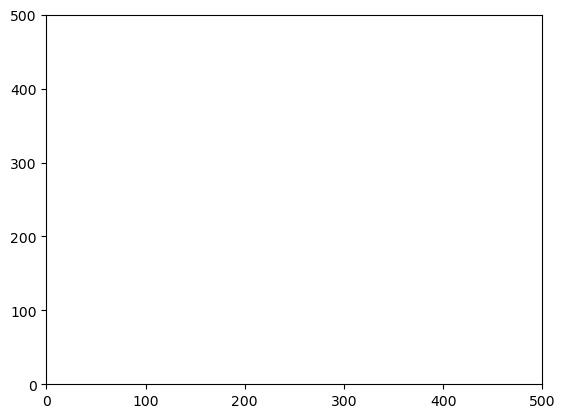

In [3]:
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import matplotlib.pyplot as plt

with open("input.txt") as arq:
    strIni = arq.readline()
    nCaso = 1

    while (strIni != "0 0") and (strIni != ""):
        numsIni = strIni.split(" ")
        numsIni = [int(numsIni[0]),int(numsIni[1])]
        
        fig, ax = plt.subplots()
        ax.axis([0,500,0,500])
        
        grpA = []
        grpB = []

        for i in range(numsIni[0]):
            strNovo = arq.readline()
            numsNovo = strNovo.split(" ")
            numsNovo = [int(numsNovo[0]),int(numsNovo[1]), int(numsNovo[2]),int(numsNovo[3])]
            p1,p2,p3,p4 = [(numsNovo[0],numsNovo[1]), (numsNovo[0],numsNovo[3]), (numsNovo[2],numsNovo[3]), (numsNovo[2],numsNovo[1])]
            novaBarraca = Polygon([p1,p2,p3,p4])
            grpA.append(novaBarraca)

        for i in range(numsIni[1]):
            strNovo = arq.readline()
            numsNovo = strNovo.split(" ")
            numsNovo = [int(numsNovo[0]),int(numsNovo[1]), int(numsNovo[2]),int(numsNovo[3])]
            p1,p2,p3,p4 = [(numsNovo[0],numsNovo[1]), (numsNovo[0],numsNovo[3]), (numsNovo[2],numsNovo[3]), (numsNovo[2],numsNovo[1])]
            novaBarraca = Polygon([p1,p2,p3,p4])
            grpB.append(novaBarraca)

        if (numsIni[0] == 0 or numsIni[1] == 0) or (numsIni[0] == 1 and numsIni[1] == 1):
            print("Caso",nCaso,"É possível separar os dois grupos!")

        else: 
            for i in range(0,len(grpA)):
                x,y = grpA[i].exterior.xy
                ax.plot(x,y,color = 'red')
                

            for i in range(0,len(grpB)):
                x,y = grpB[i].exterior.xy
                ax.plot(x,y, color="blue")
                
            
            plt.show()
            

        print("\n -> ",nCaso,"\nA:",grpA)
        print("B:",grpB)
        
        nCaso = nCaso + 1
        
        strIni = arq.readline()